In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("dark")

In [167]:
data = pd.read_csv('Car_Purchasing_Data.csv',encoding='latin-1')

In [168]:
data.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    float64
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [170]:
Cust_name = data['Customer Name']
Cust_Email = data['Customer e-mail']
Cust_Country = data.drop('Country', axis= 1)
data = data.drop(columns= ['Customer Name','Customer e-mail','Country'])

In [171]:
data.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [172]:
data['Age'] = np.round(data['Age'],0)

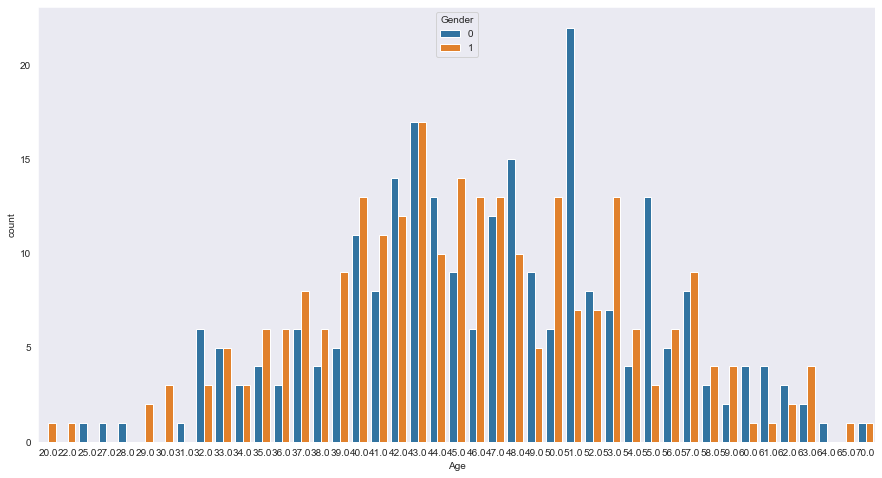

In [173]:
plt.figure(figsize=(15,8))
sns.countplot(x='Age',data=data, hue='Gender')

In [174]:
data = np.round(data,2)

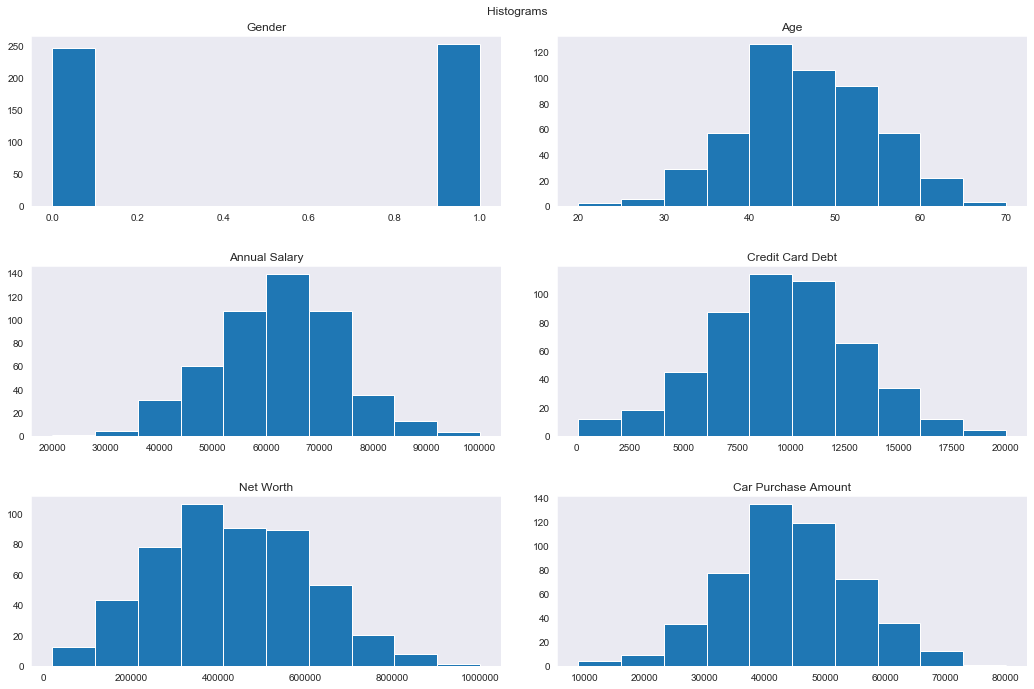

In [175]:
col = data.columns

fig,ax = plt.subplots(3,2,figsize=(15,10))
ax = ax.ravel()
fig.suptitle('Histograms')
for i in range(0, data.shape[1]):
    ax[i].hist(data[col[i]])
    ax[i].set_title(col[i])
fig.tight_layout(pad=3.0)

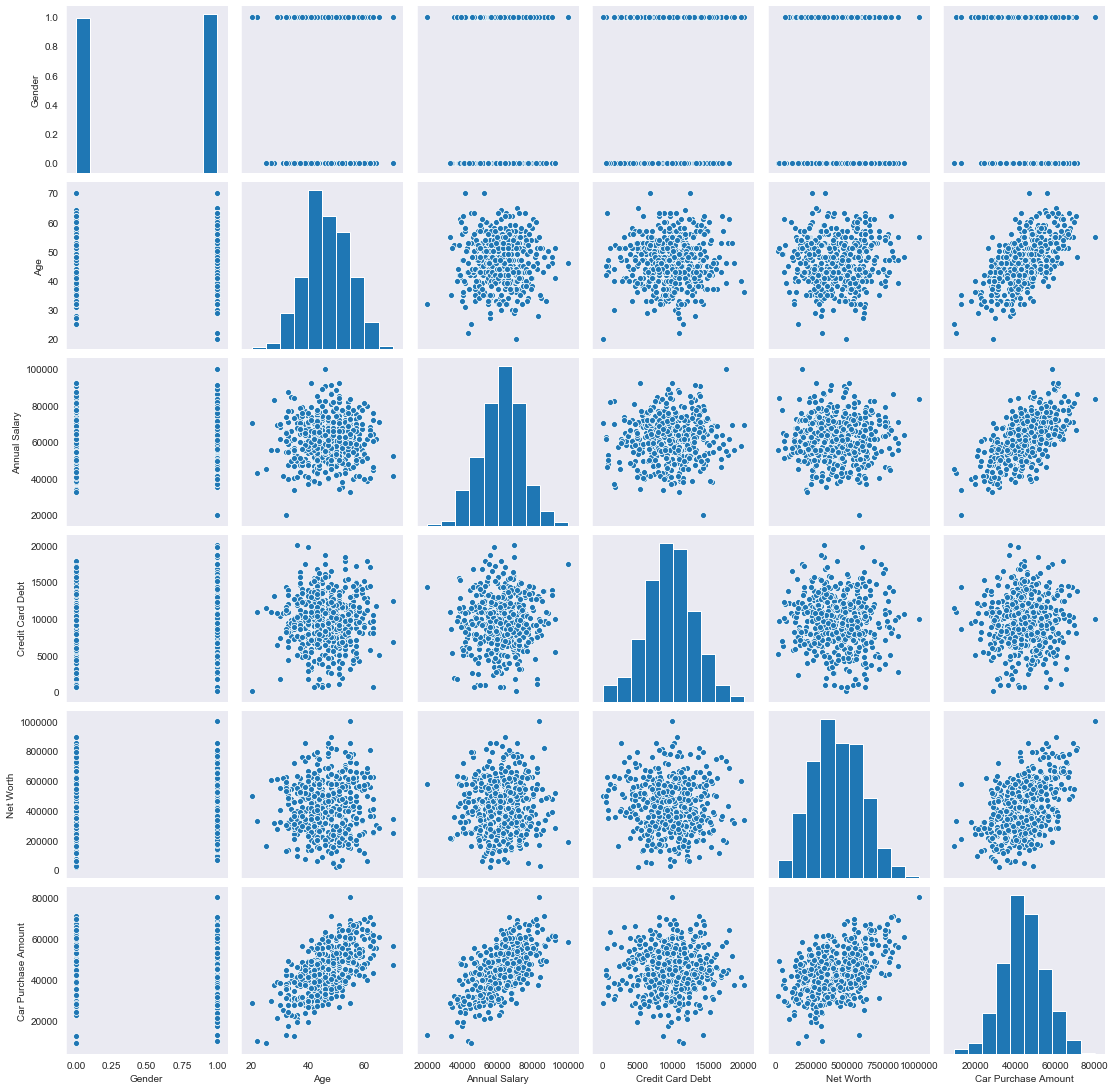

In [176]:
sns.pairplot(data)

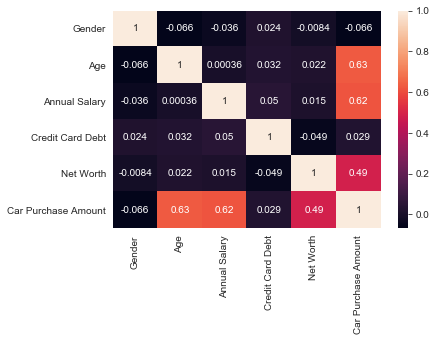

In [177]:
sns.heatmap(data.corr(),annot = True)

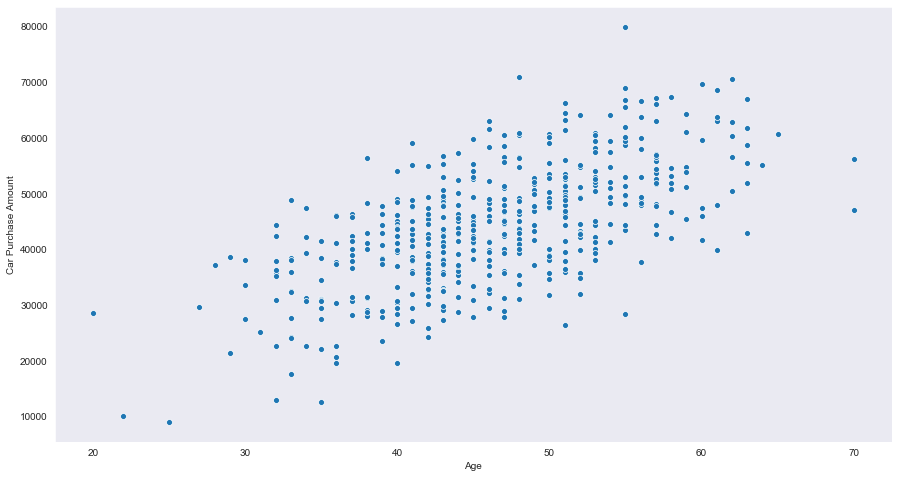

In [178]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='Age', y='Car Purchase Amount',data=data)

<Figure size 1080x576 with 0 Axes>

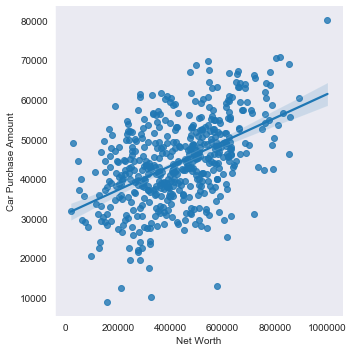

In [179]:
plt.figure(figsize=(15,8))
sns.lmplot(x='Net Worth', y='Car Purchase Amount',data=data)

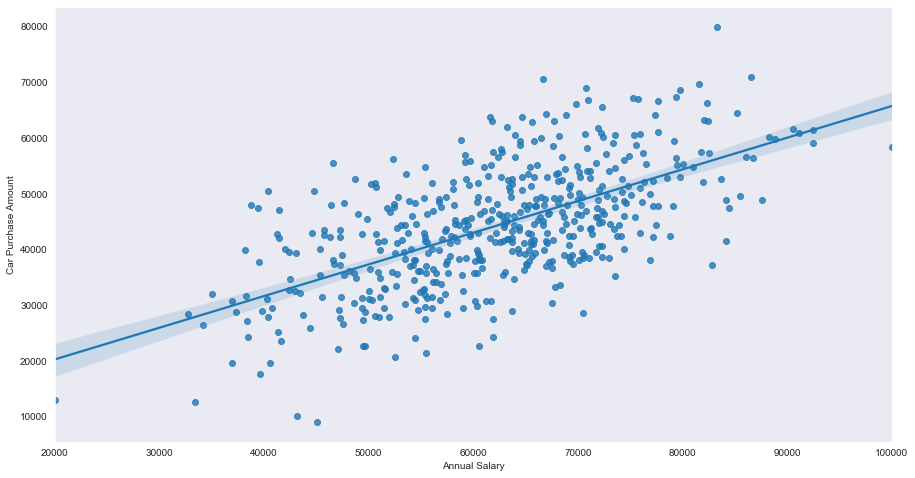

In [180]:
plt.figure(figsize=(15,8))
sns.regplot(x='Annual Salary', y='Car Purchase Amount',data=data)

In [181]:
data.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42.0,62812.09,11609.38,238961.25,35321.46
1,0,41.0,66646.89,9572.96,530973.91,45115.53
2,1,43.0,53798.55,11160.36,638467.18,42925.71
3,1,58.0,79370.04,14426.16,548599.05,67422.36
4,1,57.0,59729.15,5358.71,560304.07,55915.46


In [182]:
from sklearn.preprocessing import StandardScaler

In [183]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('Car Purchase Amount', axis=1))
data_scaled = pd.DataFrame(scaled_data,columns=data.columns[:-1])

In [271]:
X = data_scaled
y = data['Car Purchase Amount']

In [185]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [186]:
#Model 1 Linear Regression

In [187]:
from sklearn.linear_model import LinearRegression

In [188]:
lr = LinearRegression()

In [189]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [190]:
predictions = lr.predict(X_test)

In [191]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print('MAE :- %0.03f' %mean_absolute_error(y_test,predictions))
print('MSE :- %0.03f' %mean_squared_error(y_test,predictions))
print('RMSE :- %0.03f' %np.sqrt(mean_squared_error(y_test,predictions)))

MAE :- 211.944
MSE :- 61331.250
RMSE :- 247.651


In [192]:
results = pd.DataFrame(y_test.values,predictions).reset_index()
results.columns = ['Predicted','Actual']
results.head()

,Predicted,Actual
0,44785.930891,44633.99
1,45970.203341,46082.81
2,60015.791938,60461.24
3,55648.960502,55915.46
4,26271.657730,26499.31


In [193]:
#Model 2 RandomForest Regressor

In [194]:
from sklearn.ensemble import RandomForestRegressor

In [195]:
rfr = RandomForestRegressor(n_jobs=-1)

In [196]:
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [197]:
predictions_1 = rfr.predict(X_test)

In [198]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print('MAE :- %0.03f' %mean_absolute_error(y_test,predictions_1))
print('MSE :- %0.03f' %mean_squared_error(y_test,predictions_1))
print('RMSE :- %0.03f' %np.sqrt(mean_squared_error(y_test,predictions_1)))

MAE :- 1923.931
MSE :- 8946167.638
RMSE :- 2991.014


In [199]:
results_1 = pd.DataFrame(y_test.values,predictions_1).reset_index()
results_1.columns = ['Predicted','Actual']
results_1.head()

,Predicted,Actual
0,42337.7874,44633.99
1,44627.0088,46082.81
2,55317.0677,60461.24
3,53856.1518,55915.46
4,33417.6749,26499.31


In [200]:
# Model 3 Lasso

In [201]:
from sklearn.linear_model import Lasso,LassoCV
lasso=Lasso(alpha=0.001,normalize=True)

In [202]:
lasso.fit(X_train,y_train)


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [203]:
predictions_2 = lasso.predict(X_test)

In [204]:
results_2 = pd.DataFrame(y_test.values,predictions_2).reset_index()
results_2.columns = ['Predicted','Actual']
results_2.head()

,Predicted,Actual
0,44785.911737,44633.99
1,45970.223792,46082.81
2,60015.755121,60461.24
3,55648.913851,55915.46
4,26271.749918,26499.31


In [205]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print('MAE :- %0.03f' %mean_absolute_error(y_test,predictions_2))
print('MSE :- %0.03f' %mean_squared_error(y_test,predictions_2))
print('RMSE :- %0.03f' %np.sqrt(mean_squared_error(y_test,predictions_2)))

MAE :- 211.945
MSE :- 61331.732
RMSE :- 247.652


In [206]:
# Model 4 XgBoost

In [207]:
import xgboost as xgb

In [208]:
xgbr= xgb.XGBRegressor(max_depth=8, n_estimators=5)

In [209]:
xgbr.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=5, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [210]:
predictions_3 = xgbr.predict(X_test)

In [211]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print('MAE :- %0.03f' %mean_absolute_error(y_test,predictions_3))
print('MSE :- %0.03f' %mean_squared_error(y_test,predictions_3))
print('RMSE :- %0.03f' %np.sqrt(mean_squared_error(y_test,predictions_3)))

MAE :- 8097.861
MSE :- 80616586.314
RMSE :- 8978.674


In [212]:
results_3 = pd.DataFrame(y_test.values,predictions_3).reset_index()
results_3.columns = ['Predicted','Actual']
results_3.head()

,Predicted,Actual
0,34096.355469,44633.99
1,40410.746094,46082.81
2,43819.695312,60461.24
3,46114.925781,55915.46
4,28033.449219,26499.31


In [214]:
#  Model 5 TensorFlow Keras

In [298]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend


In [299]:
model = Sequential()

model.add(Dense(6))
model.add(Dropout(0.15))
model.add(Dense(4))
model.add(Dense(2))
model.add(Dense(1,))
model.compile(optimizer='adam',loss='mean_absolute_error')

backend.set_floatx('float64')

In [303]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test),
          batch_size=64,epochs=400, callbacks=EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15))

Epoch 1/400
6/6 [==============================] - 0s 15ms/step - loss: 15957.7206 - val_loss: 17021.4157
Epoch 2/400
6/6 [==============================] - 0s 7ms/step - loss: 15845.1177 - val_loss: 16826.3925
Epoch 3/400
6/6 [==============================] - 0s 7ms/step - loss: 15383.0419 - val_loss: 16628.3001
Epoch 4/400
6/6 [==============================] - 0s 7ms/step - loss: 15388.6329 - val_loss: 16429.2471
Epoch 5/400
6/6 [==============================] - 0s 8ms/step - loss: 15302.2588 - val_loss: 16231.7901
Epoch 6/400
6/6 [==============================] - 0s 7ms/step - loss: 14701.0672 - val_loss: 16031.5790
Epoch 7/400
6/6 [==============================] - 0s 9ms/step - loss: 14682.8235 - val_loss: 15833.5790
Epoch 8/400
6/6 [==============================] - 0s 8ms/step - loss: 14667.8996 - val_loss: 15634.0806
Epoch 9/400
6/6 [==============================] - 0s 6ms/step - loss: 14212.5308 - val_loss: 15433.9360
Epoch 10/400
6/6 [==============================] - 0s

Epoch 79/400
6/6 [==============================] - 0s 7ms/step - loss: 6204.0984 - val_loss: 3616.6177
Epoch 80/400
6/6 [==============================] - 0s 7ms/step - loss: 6265.3136 - val_loss: 3543.1107
Epoch 81/400
6/6 [==============================] - 0s 7ms/step - loss: 6767.7671 - val_loss: 3478.8432
Epoch 82/400
6/6 [==============================] - 0s 7ms/step - loss: 6155.0317 - val_loss: 3409.5336
Epoch 83/400
6/6 [==============================] - 0s 7ms/step - loss: 5832.1317 - val_loss: 3350.4066
Epoch 84/400
6/6 [==============================] - 0s 9ms/step - loss: 5948.0463 - val_loss: 3300.0733
Epoch 85/400
6/6 [==============================] - 0s 7ms/step - loss: 6113.8747 - val_loss: 3255.2516
Epoch 86/400
6/6 [==============================] - 0s 8ms/step - loss: 6315.6353 - val_loss: 3204.1114
Epoch 87/400
6/6 [==============================] - 0s 7ms/step - loss: 6152.0611 - val_loss: 3144.1223
Epoch 88/400
6/6 [==============================] - 0s 7ms/step 

6/6 [==============================] - 0s 11ms/step - loss: 5847.3131 - val_loss: 788.4138
Epoch 158/400
6/6 [==============================] - 0s 6ms/step - loss: 5755.9703 - val_loss: 758.8101
Epoch 159/400
6/6 [==============================] - 0s 6ms/step - loss: 5876.9189 - val_loss: 738.4234
Epoch 160/400
6/6 [==============================] - 0s 7ms/step - loss: 6096.1517 - val_loss: 731.3560
Epoch 161/400
6/6 [==============================] - 0s 7ms/step - loss: 5661.3196 - val_loss: 734.7089
Epoch 162/400
6/6 [==============================] - 0s 7ms/step - loss: 5577.5757 - val_loss: 711.9575
Epoch 163/400
6/6 [==============================] - 0s 8ms/step - loss: 6267.8719 - val_loss: 692.2660
Epoch 164/400
6/6 [==============================] - 0s 8ms/step - loss: 5586.1632 - val_loss: 690.9134
Epoch 165/400
6/6 [==============================] - 0s 7ms/step - loss: 6402.2457 - val_loss: 696.0925
Epoch 166/400
6/6 [==============================] - 0s 7ms/step - loss: 5238

In [301]:
predictions_4 = model.predict(X_test)

In [302]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

print('MAE :- %0.03f' %mean_absolute_error(y_test,predictions_4))
print('MSE :- %0.03f' %mean_squared_error(y_test,predictions_4))
print('RMSE :- %0.03f' %np.sqrt(mean_squared_error(y_test,predictions_4)))

MAE :- 17217.977
MSE :- 391270198.943
RMSE :- 19780.551
